In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import re
import urllib.request


In [2]:
import csv
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
ls -al

total 20
drwxr-xr-x 1 root root 4096 Feb 27 07:57 ./
drwxr-xr-x 1 root root 4096 Feb 27 07:55 ../
drwxr-xr-x 4 root root 4096 Feb 18 14:33 .config/
drwx------ 5 root root 4096 Feb 27 07:57 gdrive/
drwxr-xr-x 1 root root 4096 Feb 18 14:33 sample_data/


In [4]:
cd gdrive/MyDrive/LSTM 자연어처리

/content/gdrive/MyDrive/LSTM 자연어처리


In [5]:
ls -al

total 68189
-rw------- 1 root root    39277 Feb 20 15:13  dataset_LSTM.ipynb
-rw------- 1 root root 18909035 Apr 17  2020  hate_speech_binary_dataset.csv
-rw------- 1 root root  2772967 Feb 24 14:09  데이터셋.ipynb
-rw------- 1 root root  1102380 Feb 20 15:12  lstm_dataset.csv
-rw------- 1 root root  1054286 Sep 26  2020  LSTM_Dataset.csv
drwx------ 2 root root     4096 Feb 27 07:29  Mecab-ko-for-Google-Colab/
-rw------- 1 root root    32979 Feb 27 07:57  Test_Proto.ipynb
-rw------- 1 root root 20366642 Feb 20 15:07  train_dataset.csv
-rw------- 1 root root 25525459 Feb 27 06:43  train_data.txt
-rw------- 1 root root     6152 Jan 24 17:43 'Twitch 싹둑 비속어 언어 팩 - 비속어,일베,메갈 등.txt'
-rw------- 1 root root     3260 Jan 24 17:42 'Twitch 싹둑 비속어 언어 팩 - 비속어.txt'
-rw------- 1 root root     2077 Feb 20 15:11  Untitled0.ipynb
-rw------- 1 root root     3113 Feb 24 10:02  Untitled1.ipynb


In [6]:
data_df = pd.read_csv('train_dataset.csv')

# **데이터 전처리 과정**

**특수문자, 이모티콘 제거 & 데이터 전체에 적용시키기 위한 DataFrame형식으로 만들기**

In [7]:
import re


def data_preprocessing(sentence):
  sentence_split = sentence.split()

  sentence_split_result = []

  for word in sentence_split:
   if word[0] != "@" and word [:4] != "http":
     sentence_split_result.append(word)

  sentence_result = " ".join(sentence_split_result)

  text_result = "".join(re.compile('[가-힣|0-9|a-z| ]+').\
                        findall(sentence_result)).strip()

  return (text_result)

data_df["document"] = data_df["document"].apply(data_preprocessing)       #전체 데이터에 적용

**한 글자 단어 제거**

In [8]:
data_df

,Unnamed: 0,document,value,word_count
0,0,정말 재밌다 연기도 좋고 디카프리오 짱,0,6
1,1,심쿵심쿵 미치네요이수혁땜에 잠 못자겠어요자꾸 아른거림,0,5
2,2,하지만 이니후빨러들은 이런거 관심 하나도 없음,1,6
3,3,4 용지 덮고,1,4
4,4,진짜 평점 믿으면 안된 다는 걸 현실로 보여주는 영화입니다 네티즌전문가 하나같이 영...,0,20
...,...,...,...,...
189990,189995,원작을 읽을 때 이런 건 절대 영상화하기 힘들다고 생각했는데 벤휘쇼의 연기와 더불어...,0,25
189991,189996,케석대 어깨 올라간거봐라,1,4
189992,189997,day and night round the clock without a break,1,10
189993,189998,로버트다우니주니어를 좋아해서 봤는데너무재밌게 봤던영화생각없이 볼때 딱좋음,0,6


In [9]:
def one_word(sentence):

  sentence_list = []

  for index in range(len(sentence.split())):
    if len(sentence.split()[index]) > 1:      #문자 1글자ㅣ 초과
      sentence_list.append(sentence.split()[index])
      #1글자 문자 제외, 리스트 추가

  sentence = " ".join(sentence_list)
  # 리스트 내용 하나의 문자열로 join

  return(sentence)

data_df["document"] = data_df["document"].apply(one_word)

**한 문장 내에 5단어 미만 문장 제거**

In [10]:
def word_split(x):
  return len(x.split()) #단어의 개수

# data_df['word_count'] = data_df['document'].apply(word_split)
# 단어의 개수 세서 word_count 에...

In [11]:
data_df= data_df[data_df.word_count >= 5]   # word_count 값 5 이상만 남김.

In [12]:
data_df

,Unnamed: 0,document,value,word_count
0,0,정말 재밌다 연기도 좋고 디카프리오,0,6
1,1,심쿵심쿵 미치네요이수혁땜에 못자겠어요자꾸 아른거림,0,5
2,2,하지만 이니후빨러들은 이런거 관심 하나도 없음,1,6
4,4,진짜 평점 믿으면 안된 다는 현실로 보여주는 영화입니다 네티즌전문가 하나같이 영화에...,0,20
5,5,조원진이 비례대표나 경북에서 공천 못받고도 입다물면 친중질히던거 이해할게,1,8
...,...,...,...,...
189988,189993,지들 물건이라고 부셔먹었네 전세집에 공사 허가하면 안된다 이래서,1,10
189989,189994,드라마도 완전 재밌고 배우들도 멋있어서,0,5
189990,189995,원작을 읽을 이런 절대 영상화하기 힘들다고 생각했는데 벤휘쇼의 연기와 더불어 나름 ...,0,25
189992,189997,day and night round the clock without break,1,10


**문장 내 단어 25자 이상 제거 (갯수는 히스토그램으로 판별)**

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 45800 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50612 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44079 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49688 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 45800 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 50612 missing from current font.
  font.set_te

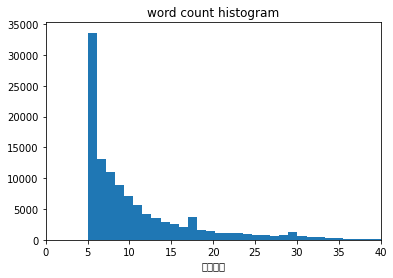

In [13]:
#히스토그램 판별


plt.hist(data_df['word_count'] , bins = 300)
plt.title('word count histogram')
plt.xlabel('단어갯수')
plt.xlim([0,40])
plt.show()



***25까지 95%의 언어가 포함되어있다.***(5단어 preprocessing 전)



In [14]:
#len(data_df[data_df['word_count']>= 50])

for i in range(20,51):
  if( (len(data_df['word_count'])* 0.05) >= len(data_df[data_df['word_count'] >= i]) ):
    print(i)
    break;

31


In [15]:
data_df = data_df[data_df.word_count <= 25]
# 25개 이하의 데이터만 사용한다.

한글의 초,중,종성 분리

In [16]:
def run(x):

  print("원래의 문장: " + x)
  consonant_ord_list = [ord(char) for char in "ㄱㄲㄴㄷㄸㄹㅁㅂㅃㅅㅆㅇㅈㅉㅊㅋㅌㅍㅎ"]
  #유니코드 초성 유니코드 리스트

  choseong_list = [char for char in "ㄱㄲㄴㄷㄸㄹㅁㅂㅃㅅㅆㅇㅈㅉㅊㅋㅌㅍㅎ"]
  #초성 리스트

  joongseong_list = [char for char in "ㅏㅐㅑㅒㅓㅔㅕㅖㅗㅘㅙㅚㅛㅜㅝㅞㅟㅠㅡㅢㅣ"]
  # 중성리스트
  
  jongseong_list = [char for char in "-ㄱㄲㄳㄴㄵㄶㄷㄹㄺㄻㄼㄽㄾㄿㅀㅁㅂㅄㅅㅆㅇㅈㅊㅋㅌㅍㅎ"]
  # 종성 리스트

  result = []

 

  for char in x: # 유니코드 숫자로 판별한다.
    
    if ord(char) == 32:
      #띄어쓰기인 경우
      result.append(char)

    elif 48<= ord(char) <= 57:
      #숫자인경우
      result.append(char)
    
    elif consonant_ord_list.count(char) == 0:

      character_code = ord(char)

      if (55203 < character_code or character_code < 44032):
        continue
      
      code = 44032

      choseong_index = (character_code - code) // 21 // 28
      
      joongseong_index = (character_code - code - (choseong_index * 21 *  28)) // 28

      jongseong_index = character_code - code - (choseong_index * 21 * 28) - (joongseong_index * 28)

      result.append (choseong_list [choseong_index])
      result.append (joongseong_list [joongseong_index])
      result.append (jongseong_list[jongseong_index])

    else:
      choseong_index = consonant_ord_list.index(ord(char))
      result.append(choseong_list[choseong_index])
      result.append ("-")               
      result.append ("-")

  return "" .join (result)

# **초중종성 분리 후 document2 삽입**

In [17]:
data_df['document2'] = data_df['document'].apply(run)

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
원래의 문장: 최루성멜로의 원조격 내가 가장 많이본영화
원래의 문장: 우리 부모님이 씨발년을 위해서 혈세 내고있는거임
원래의 문장: 신랑이랑 기분좋게 보는 드라마 입니다 가족의 따뜻함도 알게 해주고 웃기도하고 울기도 했는데 아쉽네요 시간때가 잘못되었나요 100점 줘도 안아까움
원래의 문장: 저건 프로필 사진 오픈챗 프로필을 저걸로 했었지
원래의 문장: 권영진이 새키는 대구시 공무원 중에 신천지 있는지 시정에 영향끼치고 있는지 발본색원 해라
원래의 문장: 간첩이 간첩질해서 돈잘벌수잇게 해줌 개이득 간첩질해서 돈버니 너도나도간첩질 이미간첩질에 너무많이노출되서 일상적이라서 개돼지들은 온탕개구리마냥 틀딱꼰대로몰아가는데 어차피 삶아디질때되바야 니들생각이 뭘깨달앗다쳐도 늦엇어답은 그냥 디지는거다
원래의 문장: 우선 아이는 너무 좋아하고 처음보는거나 다름없는데 캐릭터들을 아이들이 말할때 이정도로 좋아했구나 새삼 느꼈습니다화려한 색상은 일본만화의 정석이구요 상상력을 높여주는 좋은 영화라고 생각합니다
원래의 문장: 지지율 99나오는 테러단체가 국가 자치지역중 하나인데 나라가 제대로 되길 바라고있네 븅신새끼들
원래의 문장: 그걸또 찾아보고있냐 사람 사생활이라는게있지 코랑 인중 턱만봐도 호남형인게 보이자너 생긴게 사생활이없네
원래의 문장: 배잡고 웃다가 눈물 펑펑 쏟다가 최고의 드라마
원래의 문장: 인투터스똠 보고나서 감동먹고 또봤음 후속작이 이리 빨리 나올줄이야
원래의 문장: 대개 재미 잇는데 평점 이럼 2화 빨리 나와라
원래의 문장: 깜놀이 아닌 이런게 진정한 공포다
원래의 문장: 헐크에 나올때까지만 해도 미모가 살아있었는데
원래의 문장: 저런놈들은 자기 딸래미 마누라 화장품으로 장난치다 걸리면 아랫도리가 발딱발딱 하겠노
원래의 문장: 분위기 느낌이 좋아요 에드워드 노튼의 연기는 역시 최고네요
원래의 문장: 지금 한국당은 탠핵찬성한 좌좀새끼들이 장악한 상태다해체하고 새로운 우파당 만들어야함
원래의 문장: 내가 쓴

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [18]:
data_df

,Unnamed: 0,document,value,word_count,document2
0,0,정말 재밌다 연기도 좋고 디카프리오,0,6,ㅈㅓㅇㅁㅏㄹ ㅈㅐ-ㅁㅣㅆㄷㅏ- ㅇㅕㄴㄱㅣ-ㄷㅗ- ㅈㅗㅎㄱㅗ- ㄷㅣ-ㅋㅏ-ㅍㅡ-ㄹㅣ-ㅇㅗ-
1,1,심쿵심쿵 미치네요이수혁땜에 못자겠어요자꾸 아른거림,0,5,ㅅㅣㅁㅋㅜㅇㅅㅣㅁㅋㅜㅇ ㅁㅣ-ㅊㅣ-ㄴㅔ-ㅇㅛ-ㅇㅣ-ㅅㅜ-ㅎㅕㄱㄸㅐㅁㅇㅔ- ㅁㅗㅅㅈㅏ...
2,2,하지만 이니후빨러들은 이런거 관심 하나도 없음,1,6,ㅎㅏ-ㅈㅣ-ㅁㅏㄴ ㅇㅣ-ㄴㅣ-ㅎㅜ-ㅃㅏㄹㄹㅓ-ㄷㅡㄹㅇㅡㄴ ㅇㅣ-ㄹㅓㄴㄱㅓ- ㄱㅘㄴㅅ...
4,4,진짜 평점 믿으면 안된 다는 현실로 보여주는 영화입니다 네티즌전문가 하나같이 영화에...,0,20,ㅈㅣㄴㅉㅏ- ㅍㅕㅇㅈㅓㅁ ㅁㅣㄷㅇㅡ-ㅁㅕㄴ ㅇㅏㄴㄷㅚㄴ ㄷㅏ-ㄴㅡㄴ ㅎㅕㄴㅅㅣㄹㄹㅗ...
5,5,조원진이 비례대표나 경북에서 공천 못받고도 입다물면 친중질히던거 이해할게,1,8,ㅈㅗ-ㅇㅝㄴㅈㅣㄴㅇㅣ- ㅂㅣ-ㄹㅖ-ㄷㅐ-ㅍㅛ-ㄴㅏ- ㄱㅕㅇㅂㅜㄱㅇㅔ-ㅅㅓ- ㄱㅗㅇㅊ...
...,...,...,...,...,...
189988,189993,지들 물건이라고 부셔먹었네 전세집에 공사 허가하면 안된다 이래서,1,10,ㅈㅣ-ㄷㅡㄹ ㅁㅜㄹㄱㅓㄴㅇㅣ-ㄹㅏ-ㄱㅗ- ㅂㅜ-ㅅㅕ-ㅁㅓㄱㅇㅓㅆㄴㅔ- ㅈㅓㄴㅅㅔ-ㅈ...
189989,189994,드라마도 완전 재밌고 배우들도 멋있어서,0,5,ㄷㅡ-ㄹㅏ-ㅁㅏ-ㄷㅗ- ㅇㅘㄴㅈㅓㄴ ㅈㅐ-ㅁㅣㅆㄱㅗ- ㅂㅐ-ㅇㅜ-ㄷㅡㄹㄷㅗ- ㅁㅓㅅ...
189990,189995,원작을 읽을 이런 절대 영상화하기 힘들다고 생각했는데 벤휘쇼의 연기와 더불어 나름 ...,0,25,ㅇㅝㄴㅈㅏㄱㅇㅡㄹ ㅇㅣㄺㅇㅡㄹ ㅇㅣ-ㄹㅓㄴ ㅈㅓㄹㄷㅐ- ㅇㅕㅇㅅㅏㅇㅎㅘ-ㅎㅏ-ㄱㅣ-...
189992,189997,day and night round the clock without break,1,10,


# **FastText 모델 사용한 단어 임베딩**

In [19]:
pip install fasttext

     |████████████████████████████████| 68 kB 2.5 MB/s 
  Using cached pybind11-2.9.1-py2.py3-none-any.whl (211 kB)
  Created wheel for fasttext: filename=fasttext-0.9.2-cp37-cp37m-linux_x86_64.whl size=3128473 sha256=a46a1c4691e42225d9a39c41be5f8becef9933b553a5dfc7dbcefaef3a70c1d0
  Stored in directory: /root/.cache/pip/wheels/4e/ca/bf/b020d2be95f7641801a6597a29c8f4f19e38f9c02a345bab9b
Successfully built fasttext


FastText 학습

In [20]:
import fasttext
from tqdm import tqdm

In [21]:
# 트레이닝 데이터는 documnet2( 댓글의 초,중,종성 분리한 것 )

#train_data =" ".join(data_df.document2[0])   이런식으로 str 타입을 train data로 놓을시 오류가 생긴다.

f = open("train_data.txt", 'w')
for i in (data_df.document2):
  f.write(i)

f.close()

#이런 식으로 txt 파일로 만들어서 파일 경로를 넣어야 제대로 model 이 된다.


In [22]:
# 하이퍼 파라미터는 실험후 조정해야한다. 모델의 학습방식은 Skip-Gram, LR = 0.05, Dimension 100 , Window Size = 5 , Epoch=50, N-gram 1~6
ft_model = fasttext.train_unsupervised(input = 'train_data.txt',
                                   model = 'skipgram', lr =0.05,
                                   dim = 100, ws = 5, epoch =5,
                                   minn = 1, word_ngrams = 6)

단어 임베딩 과정

In [23]:
train_vec = []

sentence_number = 25

for sen in tqdm(data_df.document2.values):
  word_list_vec = []

  sen_split = sen.split()

  for w_index in range(sentence_number):
    
    # 입력크기 맞추기 위함.. 글자만큼 입력 받고
    if (w_index < len(sen_split)):
      word_list_vec.append(ft_model[sen_split[w_index]])
    
    # 입력 후 0으로 크기 맞추기 = zero padding
    else:
      word_list_vec.append(np.array([0]*100)) 
    
  word_list_vec = np.array(word_list_vec)

  train_vec.append(word_list_vec)

train_vec = np.array(train_vec)

train_vec.shape

100%|██████████| 106147/106147 [00:44<00:00, 2395.66it/s]


(106147, 25, 100)

# **LSTM 모델 구조**

# **DATA part**

In [24]:
# 이 전에 x_train y_train 데이터셋을 나누는 작업을 진행 해야함
# LSTM_Dataset.csv 원본데이터
# lstm_dataset =  사용할 정제된 데이터

## 오류! 트레이닝용 데이터 다시 전처리 필요****
# 토큰화 등...

In [25]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split

In [26]:
lstm_data = pd.read_csv('lstm_dataset.csv')

In [27]:
len(lstm_data)

10000

In [28]:
lstm_data['document'].nunique(), lstm_data['label'].nunique()

(9987, 2)

In [29]:
lstm_data.drop_duplicates(subset = ['document'], inplace = True)

print(len(lstm_data))

9987


In [30]:
lstm_data.isnull().values.any()

False

In [31]:
train_data , test_data = train_test_split(lstm_data, test_size = 0.25, random_state = 0)

print( 'Training Data: ', len(train_data))
print( 'Test Data: ', len(test_data))

Training Data:  7490
Test Data:  2497


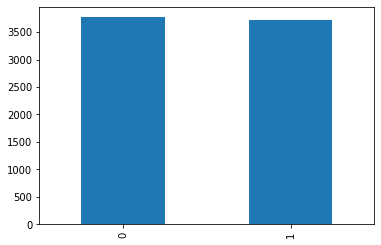

In [32]:
train_data['label'].value_counts().plot(kind = 'bar')

In [33]:
train_data['document'] = train_data['document'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")
# 한글과 공백 제외 모두 제거
train_data['document'].replace('',np.nan , inplace= True)

print(train_data.isnull().sum())

Unnamed: 0    0
document      0
label         0
dtype: int64


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  """Entry point for launching an IPython kernel.


In [34]:
test_data['document'] = test_data['document'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")
# 정규 표현식

test_data['document'].replace('',np.nan , inplace= True)
# 공백은 null값으로

test_data = test_data.dropna(how = 'any') #NULL 값 제거

print('전처리 후 테스트 샘플: ', len(test_data))


전처리 후 테스트 샘플:  2497


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  """Entry point for launching an IPython kernel.


In [35]:
#불용어 정의

stop_words = ['도', '는', '다', '의', '가', '이', '은',
              '한', '에', '하', '고', '을', '를', 
              '인', '듯', '과', '와', '네', '들',
              '듯', '지', '임', '게', '만',
              '겜', '되', '음', '면']

# **형태소 분석기 MEcab**

In [36]:
!apt-get update
!apt-get install g++ openjdk-8-jdk 
!pip3 install konlpy JPype1-py3
!bash <(curl -s https://raw.githubusercontent.com/konlpy/konlpy/master/scripts/mecab.sh)

Get:1 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Ign:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Get:3 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ Packages [76.8 kB]
Ign:4 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Get:5 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release [696 B]
Get:6 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease [15.9 kB]
Get:7 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Hit:8 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Get:9 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release.gpg [836 B]
Hit:10 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:12 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Get:13 https://developer.download.nvi

In [37]:
from konlpy.tag import Mecab

In [38]:
mecab = Mecab()

# **토큰화**

In [42]:
train_data['tokenized'] = train_data['document'].apply(mecab.morphs)

train_data['tokenized'] = train_data['tokenized'].apply(lambda x: [item for item in x if item not in stop_words])


test_data['tokenized'] = test_data['document'].apply(mecab.morphs)

test_data['tokenized'] = test_data['tokenized'].apply(lambda x: [item for item in x if item not in stop_words])

In [43]:
negative_words = np.hstack(train_data[train_data.label == 1]['tokenized'].values)
positive_words = np.hstack(train_data[train_data.label == 0]['tokenized'].values)

In [45]:
from collections import Counter

In [46]:
negative_word_count = Counter(negative_words)
print(negative_word_count.most_common(20))

[('거', 682), ('ㅋㅋ', 538), ('냐', 484), ('있', 480), ('나', 474), ('아', 472), ('안', 441), ('보', 406), ('니', 371), ('어', 348), ('로', 336), ('새끼', 333), ('같', 319), ('없', 308), ('말', 304), ('으로', 294), ('여자', 290), ('아니', 264), ('야', 256), ('에서', 253)]


In [47]:
positive_word_count = Counter(positive_words)
print(positive_word_count.most_common(20))

[('거', 506), ('있', 467), ('보', 464), ('안', 398), ('좋', 392), ('잘', 359), ('는데', 355), ('나', 353), ('없', 317), ('같', 304), ('으로', 284), ('사람', 277), ('겠', 277), ('너무', 269), ('것', 263), ('아니', 258), ('아', 257), ('어', 250), ('ㅋㅋ', 249), ('했', 244)]


# **정수 인코딩**

In [49]:
X_train = train_data['tokenized'].values
y_train = train_data['label'].values
X_test= test_data['tokenized'].values
y_test = test_data['label'].values

In [50]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)

In [51]:
threshold = 2
total_cnt = len(tokenizer.word_index) # 단어의 수
rare_cnt = 0 # 등장 빈도수가 threshold보다 작은 단어의 개수를 카운트
total_freq = 0 # 훈련 데이터의 전체 단어 빈도수 총 합
rare_freq = 0 # 등장 빈도수가 threshold보다 작은 단어의 등장 빈도수의 총 합

# 단어와 빈도수의 쌍(pair)을 key와 value로 받는다.
for key, value in tokenizer.word_counts.items():
    total_freq = total_freq + value

    # 단어의 등장 빈도수가 threshold보다 작으면
    if(value < threshold):
        rare_cnt = rare_cnt + 1
        rare_freq = rare_freq + value

print('단어 집합(vocabulary)의 크기 :',total_cnt)
print('등장 빈도가 %s번 이하인 희귀 단어의 수: %s'%(threshold - 1, rare_cnt))
print("단어 집합에서 희귀 단어의 비율:", (rare_cnt / total_cnt)*100)
print("전체 등장 빈도에서 희귀 단어 등장 빈도 비율:", (rare_freq / total_freq)*100)

단어 집합(vocabulary)의 크기 : 14446
등장 빈도가 1번 이하인 희귀 단어의 수: 7475
단어 집합에서 희귀 단어의 비율: 51.744427523189806
전체 등장 빈도에서 희귀 단어 등장 빈도 비율: 6.891115761525909


In [52]:
# 전체 단어 개수 중 빈도수 2이하인 단어 개수는 제거.
# 0번 패딩 토큰과 1번 OOV 토큰을 고려하여 +2
vocab_size = total_cnt - rare_cnt + 2
print('단어 집합의 크기 :',vocab_size)

단어 집합의 크기 : 6973


In [53]:
tokenizer = Tokenizer(vocab_size, oov_token = 'OOV') 
tokenizer.fit_on_texts(X_train)
X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)

리뷰의 최대 길이 : 220
리뷰의 평균 길이 : 14.482376502002671


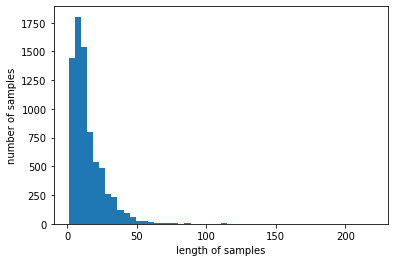

In [54]:
print('리뷰의 최대 길이 :',max(len(review) for review in X_train))
print('리뷰의 평균 길이 :',sum(map(len, X_train))/len(X_train))
plt.hist([len(review) for review in X_train], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

In [56]:
max_len = 100
X_train = pad_sequences(X_train, maxlen=max_len)
X_test = pad_sequences(X_test, maxlen=max_len)


In [57]:
X_train.shape

(7490, 100)

# **LSTM part**

In [96]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Embedding,  Bidirectional
from tensorflow.keras.models import load_model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
# import keras

In [59]:
embedding_dim = 100
hidden_units = 128

In [97]:

model = Sequential()

model.add(Embedding(vocab_size, embedding_dim))

model.add((LSTM(hidden_units)))

model.add(Dense( 1, activation='sigmoid'))

model.compile(loss = 'binary_crossentropy',
              optimizer = 'RMSprop',
              metrics = ['accuracy'])

history = model.fit(X_train, y_train, epochs=3, batch_size=256, validation_split=0.2)

Epoch 1/3
24/24 [==============================] - 22s 812ms/step - loss: 0.6667 - accuracy: 0.6372 - val_loss: 0.5909 - val_accuracy: 0.7657
Epoch 2/3
24/24 [==============================] - 18s 731ms/step - loss: 0.4563 - accuracy: 0.8198 - val_loss: 0.4919 - val_accuracy: 0.7497
Epoch 3/3
24/24 [==============================] - 18s 737ms/step - loss: 0.3382 - accuracy: 0.8648 - val_loss: 0.3876 - val_accuracy: 0.8271


In [98]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_7 (Embedding)     (None, None, 100)         697300    
                                                                 
 lstm_6 (LSTM)               (None, 128)               117248    
                                                                 
 dense_6 (Dense)             (None, 1)                 129       
                                                                 
Total params: 814,677
Trainable params: 814,677
Non-trainable params: 0
_________________________________________________________________


# **비속어 판별**

In [90]:
def sentiment_predict(new_sentence):
  new_sentence = re.sub(r'[^ㄱ-ㅎㅏ-ㅣ가-힣 ]','', new_sentence)
  new_sentence = mecab.morphs(new_sentence) # 토큰화
  new_sentence = [word for word in new_sentence if not word in stop_words] # 불용어 제거
  encoded = tokenizer.texts_to_sequences([new_sentence]) # 정수 인코딩
  pad_new = pad_sequences(encoded, maxlen = max_len) # 패딩
  score = float(model.predict(pad_new)) # 예측
  if(score > 0.5):
    print("{:.2f}% 확률로 부정 리뷰입니다.".format(score * 100))
  else:
    print("{:.2f}% 확률로 긍정 리뷰입니다.".format((1 - score) * 100))

In [99]:
sentiment_predict("이거 정말 개좆같네")

74.03% 확률로 부정 리뷰입니다.


In [100]:
sentiment_predict("이게 왜이러는지도 모르겠고 정말 쓰레기같아요 최고입니다 짱짱")

87.70% 확률로 긍정 리뷰입니다.


# **혼동행렬**